
# Project: FBI Gun Data

## About Selected Dataset:

>The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from <a href="https://www.google.com/url?q=https://www.census.gov/&sa=D&ust=1516156946823000&usg=AFQjCNE_WOisJSuDoHwpv9_B6pupdtzB8Q">census.gov</a>.

><ul>
<li>The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
<li>The <a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&ust=1516156946824000&usg=AFQjCNEkN0Yr-SP1s5t9KNpNrZh1S-AnBQ">U.S. census data</a> is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.
</ul>

>### Selected Questions For Investigation:
<ol>
<li>What is the overall trend of gun purchases?
<li>Which states have had the highest growth in gun registrations?
<li>What is trend of Gun Permit in cities that have more Guns?
<li>What is the overall trend of Gun Permits across years?
<li>Which is the most Popular Gun?
<li>Which Gun is returned the most?
<li>Which Gun sold most in private sales and in which state?
</ol>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The given database **Gun data** has various information captured about Guns used in USA across month and year wise for various parameters.  In order to analyse and find result for queries above there is a need to fine tune the original dataset and obtain new dataset to answer those questions.<br>

### Steps For Implementation:

<ul>
<li> Load and read through dataset.
<li> Select the dataset columns for operations.
<li> Create resultant dataset template
<li> Create functions to derive result data.
<li> Add function output to resultant dataset.
<li> Plot Graphs with resultant data.
<li> Communicate results and conclude.
</ul>

<a id='wrangling'></a>
## Data Wrangling

>To start with let's load datasets and explore it.

### General Properties
<ul>
<li> Add in import statements.
<li> Load datasets.
<li> Read through dataset.
<li> Navigate through columns and datatypes.
</ul>

In [1]:
# Import statements
import pandas as pd
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
df_gd = pd.read_csv('gun_data.csv')

### Dataset Review 
<ol>
<li> Check dataset is successfully loaded or not.
<li> Check for column datatypes.
<li> Check for Unique column names.
<li> Column name should not have any space.
</ol>

In [2]:
#Reading few lines of dataset to ensure data loaded properly
df_gd.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
#Reading dataset columns to find their datatype
df_gd.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

### Defining Ustate lists:
> <p> To start with let's find all the unique states available in dataset and save it in Ustate list. </p>

In [4]:
#Finding Unique states available in dataset
Ustate=[]
for index,row in df_gd.iterrows():
    val = row['state']
    if (val not in Ustate[:]):
        Ustate.append(val)
print('Total number of Unique states: ',len(Ustate))
print("Unique States: ",Ustate)

Total number of Unique states:  55
Unique States:  ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


### Defining NoOFYears lists:
> <p> After states we need to have separate list for number of years.  In order to user them in functions. </p>

In [5]:
#Creating list of Years
NoOfYears = list(range(1998,2018))
print(NoOfYears)

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [6]:
#Creating empty resultant dataframe to save final results
df_resultant=pd.DataFrame(columns=['Year','State'])

In [7]:
#Reviewing the dataframe
df_resultant

,Year,State


<a id='eda'></a>
## Exploratory Data Analysis

### Defining Functions to derive resultant dataset:

> **Function 1: To find Avg value of column values**
<p>In order to arrive datapoints to plot graph against,  There are is a need to find average value of certain columns in source dataset such as Total Guns, Number of Permits, Handguns, Long Guns and Other Guns.  Because these values are listed in compounded manner for each month and year.  Therefore we need average values.</p>
<br>
> **Function 2: To find Total value of column values**
<p>Simillarly there are columns in source dataset which require to find totals for example columns such as returned handgun, long gun, other gun, Private sale handgun, long gun and other guns.  These values in source dataset are indicated for that particular year and month.  Therefor we need total values.</p>

In [28]:
def Find_Avg_From_Dataset(State, Year, column):
    #Temporary Inputs to test
    #State='Alabama'
    #Year='2017'
    #column='long_gun'

    #Variable declaration and assignment
    FindAvg=0
    Count=0
    FinalVal=0

    #Creating temporary dataset for operation
    state_df = df_gd.query('state=="{}"'.format(State))
    temp_df=state_df[['month',column]]

    #Drop null values
    temp_df=temp_df.dropna()

    #Finding Minimum and Maximum gun data for selected year and state
    for index,row in temp_df.iterrows():
        temp=row[column]
        val=int(row[column])
        tm=str(row['month'])
        if tm[:4]==Year:
            FindAvg=FindAvg+val
            Count=Count+1
    if Count>0:
        FinalVal=round(FindAvg/Count,0)
    else:
        FinalVal=0

    #Printing results for each result set
    #print(State,"Avg :",FinalVal," for year ",Year) 
    
    #Return the final value
    return(FinalVal)

In [29]:
def Find_Total_From_Dataset(State, Year, column):
    #Temporary Inputs to test
    #State='Texas'
    #Year='1990'
    #column='returned_other'

    #Variable declaration and assignment
    FinalVal=0

    #Creating temporary dataset for operation
    state_df = df_gd.query('state=="{}"'.format(State))
    temp_df=state_df[['month',column]]

    #Drop null values
    temp_df=temp_df.dropna()

    #Finding Minimum and Maximum gun data for selected year and state
    for index,row in temp_df.iterrows():
        temp=row[column]
        val=int(row[column])
        tm=str(row['month'])
        if tm[:4]==Year:
            FinalVal=FinalVal+val

    #Printing results for each result set
    #print(State,"Avg :",FinalVal," for year ",Year) 
    
    #Return the final value
    return(FinalVal)

#### Adding resultant dataset basic columns such as state and year.

In [10]:
#Adding basic columns and values to resultant dataframe
for State in list(Ustate):
    for Year in list(NoOfYears):  
        temp_df = pd.DataFrame([[Year, State]],columns=['Year','State'])
        df_resultant=df_resultant.append(temp_df, ignore_index=True)

In [11]:
#Creating new list for columns for which avg values to be found
AvgCols=['totals','permit','handgun','long_gun','other']

#Creating new list for columns for which total values to be found
TotCols=['returned_handgun','returned_long_gun','returned_other','private_sale_handgun','private_sale_long_gun','private_sale_other']

In [30]:
#Gathering data for resultant dataset average columns
for col in list(AvgCols):
    xtemp_df=pd.DataFrame(columns=[col])
    for State in list(Ustate):
        for Year in list(NoOfYears):  
            result = Find_Avg_From_Dataset(str(State), str(Year), str(col))
            temp_df=pd.DataFrame([result], columns=[col])
            xtemp_df=xtemp_df.append(temp_df, ignore_index=True)
    #Add final result column into resultant dataset
    df_resultant[col]=xtemp_df[col]

In [31]:
#Gathering data for resultant dataset total columns
for col in list(TotCols):
    xtemp_df=pd.DataFrame(columns=[col])
    for State in list(Ustate):
        for Year in list(NoOfYears):  
            result = Find_Total_From_Dataset(str(State), str(Year), str(col))
            temp_df=pd.DataFrame([result], columns=[col])
            xtemp_df=xtemp_df.append(temp_df, ignore_index=True)
    #Add final result column into resultant dataset
    df_resultant[col]=xtemp_df[col]

## Reviewing Resultant dataset

In [32]:
df_resultant.tail(10)

,Year,State,totals,permit,handgun,long_gun,other,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other
1090,2008,Wyoming,4105.0,353.0,1275.0,2084.0,0,0,0,0,0,0,0
1091,2009,Wyoming,4283.0,579.0,1311.0,1948.0,16,0,0,0,0,0,0
1092,2010,Wyoming,3976.0,493.0,1216.0,1791.0,25,0,0,0,0,0,0
1093,2011,Wyoming,4352.0,333.0,1549.0,1963.0,30,0,0,0,0,0,0
1094,2012,Wyoming,5280.0,325.0,2002.0,2355.0,48,0,0,0,0,0,0
1095,2013,Wyoming,5889.0,583.0,2224.0,2481.0,75,0,0,0,1,0,0
1096,2014,Wyoming,5255.0,587.0,1805.0,2264.0,73,0,0,0,0,0,0
1097,2015,Wyoming,5195.0,556.0,1864.0,2189.0,94,0,1,0,8,16,0
1098,2016,Wyoming,5300.0,662.0,1881.0,2151.0,121,0,2,0,9,21,2
1099,2017,Wyoming,4193.0,383.0,1545.0,1680.0,99,0,0,0,45,39,3


In [33]:
#Reviewing column types of resultant dataset
df_resultant.dtypes

Year                      object
State                     object
totals                   float64
permit                   float64
handgun                  float64
long_gun                 float64
other                     object
returned_handgun          object
returned_long_gun         object
returned_other            object
private_sale_handgun      object
private_sale_long_gun     object
private_sale_other        object
dtype: object

In [34]:
#Modifying dataset column types from object to integer in order to plot graph
df_resultant['other']=df_resultant['other'].astype(int)
df_resultant['returned_handgun']=df_resultant['returned_handgun'].astype(int)
df_resultant['returned_long_gun']=df_resultant['returned_long_gun'].astype(int)
df_resultant['returned_other']=df_resultant['returned_other'].astype(int)
df_resultant['private_sale_handgun']=df_resultant['private_sale_handgun'].astype(int)
df_resultant['private_sale_long_gun']=df_resultant['private_sale_long_gun'].astype(int)
df_resultant['private_sale_other']=df_resultant['private_sale_other'].astype(int)

In [35]:
#Reviewing column types of after modification
df_resultant.dtypes

Year                      object
State                     object
totals                   float64
permit                   float64
handgun                  float64
long_gun                 float64
other                      int32
returned_handgun           int32
returned_long_gun          int32
returned_other             int32
private_sale_handgun       int32
private_sale_long_gun      int32
private_sale_other         int32
dtype: object

### 1. What is the overall Trend of Gun Purchases?
> Overall Trend seems to be increase in number of gun purchased year over years.  2016 marks highest year of Gun Purchases and 1998 being least.  However there is also slice decline in purchase can also be observed.

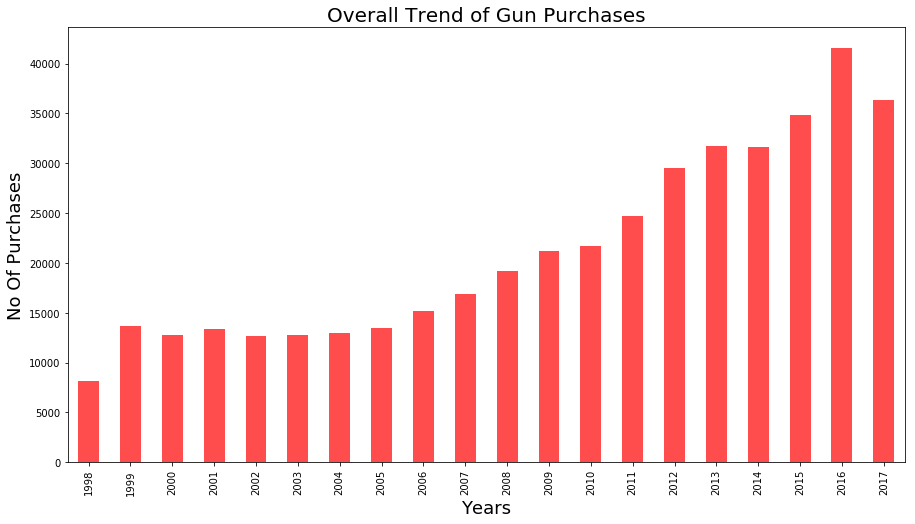

In [15]:
df_resultant.groupby('Year')['totals'].mean().plot(kind='bar',figsize=(15,8), color=['red'], alpha=.7)
plt.xlabel('Years', fontsize=18)
plt.ylabel('No Of Purchases', fontsize=18)
plt.title('Overall Trend of Gun Purchases',fontsize=20);

### 2.  Which states have had highest Gun Registrations?
> From the graph below it can be observed that Kentucky had highest Guns followed by Texas and California.

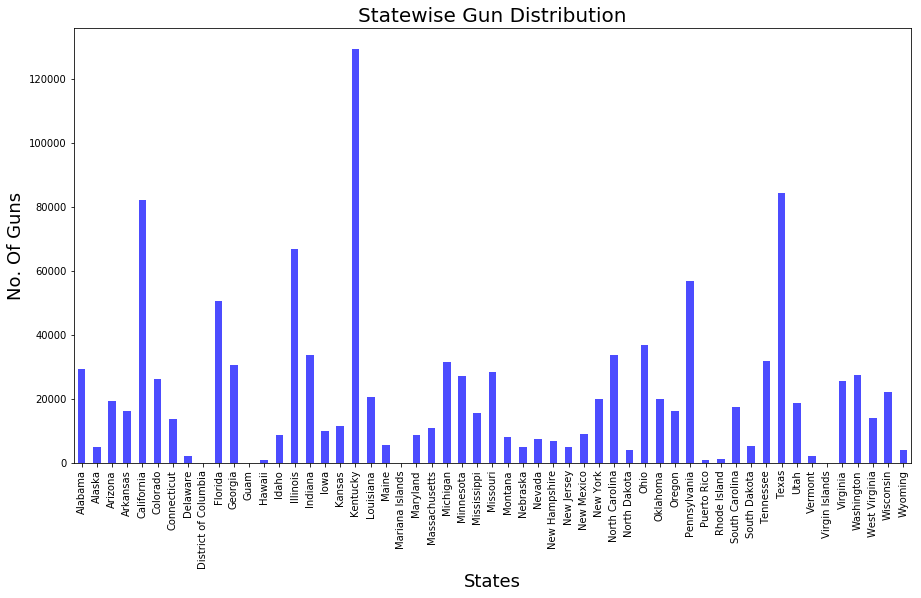

In [59]:
df_resultant.groupby('State')['totals'].mean().plot(kind='bar', figsize=(15,8), color=['blue'], alpha=.7)
plt.xlabel('States', fontsize=18)
plt.ylabel('No. Of Guns', fontsize=18)
plt.title('Statewise Gun Distribution',fontsize=20);

### 3. What is trend of Gun Permit in cities that have more Guns?
> In early 2000's it was California and Texas which had more permits than Kentucky.  But after 2005 Kentucky takes the lead to have more number of gun permits.

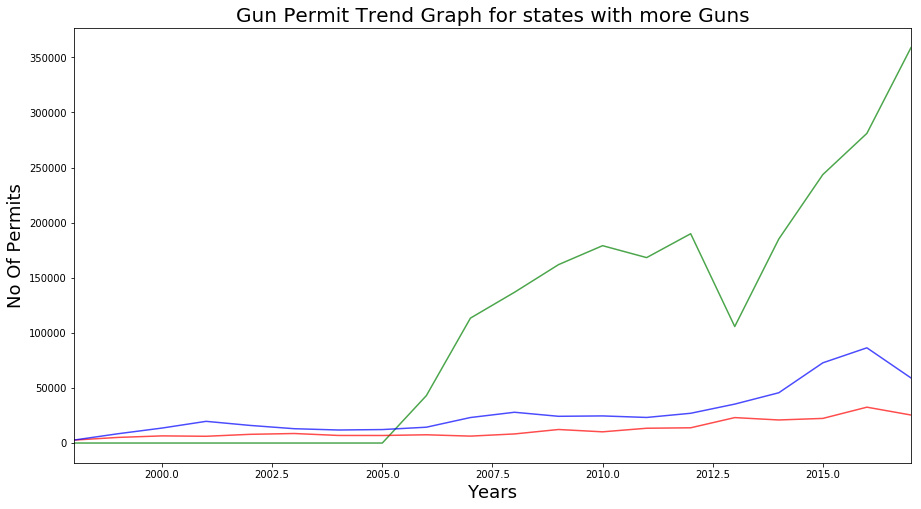

In [60]:
#df_resultant.groupby('State')['permit'].mean()
df_resultant.query('State=="Kentucky"').groupby('Year')['permit'].mean().plot(kind='line', figsize=(15,8), color=['green'], alpha=.7)
df_resultant.query('State=="Texas"').groupby('Year')['permit'].mean().plot(kind='line', figsize=(15,8), color=['Red'], alpha=.7)
df_resultant.query('State=="California"').groupby('Year')['permit'].mean().plot(kind='line', figsize=(15,8), color=['blue'], alpha=.7)
plt.xlabel('Years', fontsize=18)
plt.ylabel('No Of Permits', fontsize=18)
plt.title('Gun Permit Trend Graph for states with more Guns',fontsize=20);

### 4. What is the overall trend of Gun Permit across Years?

>  It can be observed that until 2005 the maximum Gun permits were around 2000 only.  Since 2005 there is steady rise in gun permits over the years.

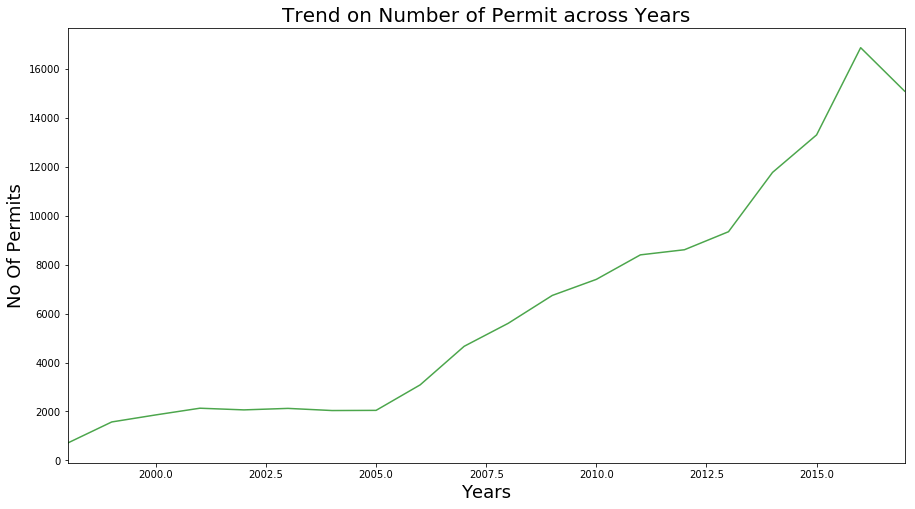

In [55]:
df_resultant.groupby('Year')['permit'].mean().plot(kind='line', figsize=(15,8), color=['green'], alpha=.7)
plt.xlabel('Years', fontsize=18)
plt.ylabel('No Of Permits', fontsize=18)
plt.title('Trend on Number of Permit across Years',fontsize=20);

### 5. Which is the most Popular Gun?
> The people's choice of Gun is **Long Gun** followed by Hand Gun and Other Guns.

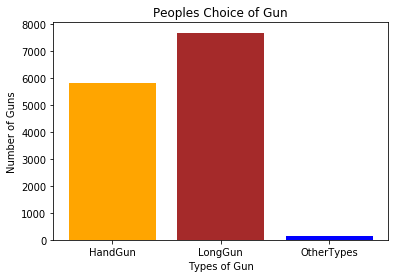

In [56]:
hg = df_resultant['handgun'].mean()
lg = df_resultant['long_gun'].mean()
og = df_resultant['other'].mean()
plt.bar([1,2,3], [hg, lg, og],tick_label=['HandGun','LongGun','OtherTypes'], color=['orange','brown','blue'])
plt.figsize=(15,8)
plt.title('Peoples Choice of Gun', fontsize=12)
plt.xlabel('Types of Gun', fontsize=10)
plt.ylabel('Number of Guns', fontsize=10);

### 6. Which Gun is returned the most?
> People returned more of handguns followed by long gun and others.

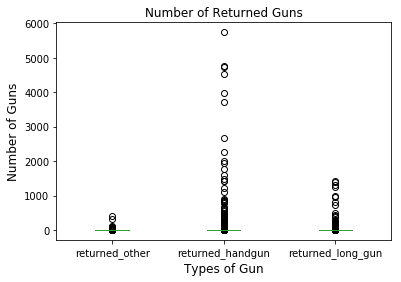

In [19]:
df_resultant[['returned_other','returned_handgun','returned_long_gun']].plot(kind='box')
plt.title('Number of Returned Guns', fontsize=12)
plt.xlabel('Types of Gun', fontsize=12)
plt.ylabel('Number of Guns', fontsize=12);

### 7. Which Gun sold most in private sales and in which state?
> Washington and Newyork tops in private Gun sales.  Of which Handgun was top pick followed by long gun and other guns.

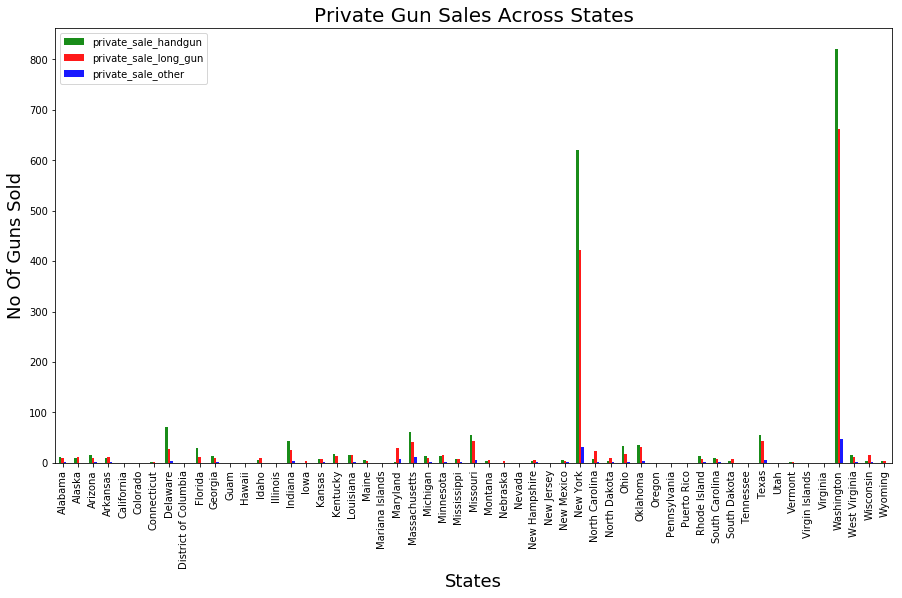

In [41]:
df_resultant.groupby('State')[['private_sale_handgun', 'private_sale_long_gun','private_sale_other']].mean().plot(kind='bar', figsize=(15,8), color=['green','red','blue'], alpha=.9)
plt.xlabel('States', fontsize=18)
plt.ylabel('No Of Guns Sold', fontsize=18)
plt.title('Private Gun Sales Across States',fontsize=20);

<a id='conclusion'></a>
## Conclusion

<ol>
<li>What is the overall trend of gun purchases? **- Increased over the years.**
<li>Which states have had the highest growth in gun registrations? **-Kentucky, Texas and California.**
<li>What is trend of Gun Permit in cities that have more Guns? **-Significant increase since 2005.**
<li>What is the overall trend of Gun Permits across years? **-Increased over the time.**
<li>Which is the most Popular Gun? **-Long Gun.**
<li>Which Gun is returned the most? **-Hand Gun.**
<li>Which Gun sold most in private sales and in which state? **-HandGun in Washington.**
</ol>

### Dataset Limitations/Challenges:
> <p>During the process there were challenges in generating final resultant dataset.  Certain columns had null/missing values in source dataset which made to loose key values. </p>
<ul>
> <li> This null value caused trouble in deriving resultant dataset while performing operation in functions.  I manage to overcome by dropping all the null values in the column.
> <li> This also had hinderence in plotting  final graph.  For example if you look at the graph above more than 15 states have no data hence there is no bar plotted for it.
> <li> The source dataset also had only two gun types like hand gun and long gun there were no mention of other types of gun they were just classified as one column other.  If they had more types this would have been more interesting.
</ul>

> <p>  Hence if there were more data points (if not all) the results would have been much more appealing.</p>